In [5]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
#from sklearn import cluster
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.decomposition import PCA
from scipy.spatial.distance import cdist
import matplotlib.cm as cm
import pandas as pd
from sklearn.preprocessing import StandardScaler

In [6]:
from osgeo import gdal

dataset = gdal.Open("/data/gdrive/Data/Planet_imagery/1154314_2014-07-23_RE2_3A_Analytic_clip.tif", gdal.GA_ReadOnly)
array = np.array([dataset.GetRasterBand(1).ReadAsArray().flatten()])
for x in range(2, dataset.RasterCount + 1):
    band = dataset.GetRasterBand(x)
    array = np.append(array,[band.ReadAsArray().flatten()],axis=0)
    
array = np.transpose(array)

In [7]:
print (dataset.RasterCount, dataset.RasterYSize, dataset.RasterXSize)
arys=[]
for i in range(1, dataset.RasterCount+1):
    arys.append(dataset.GetRasterBand(i).ReadAsArray())
arys = np.concatenate(arys)

5 2904 1920


In [8]:
#array = np.hstack((array,np.column_stack((array[:,4]-array[:,3])/(array[:,4]+array[:,3])).T))

In [9]:
df_tif = pd.DataFrame(array)
df_tif.head()

,0,1,2,3,4
0,10156,10360,10188,9253,8359
1,10541,10514,10083,9175,9308
2,10619,9845,9071,8712,9363
3,9202,8978,8564,7857,8489
4,9699,9874,8689,7702,7861


In [11]:

x_scaled = StandardScaler().fit_transform(array.astype(np.float64))

In [12]:
x_scaled[0]

array([1.08797375, 1.35263627, 1.4003571 , 1.55592707, 0.6051985 ])

In [15]:
x_scaled.shape

(5575680, 5)

In [16]:
#sklearn_pca = PCA(n_components=6)
#X_sklearn = sklearn_pca.fit_transform(x_scaled)
X_sklearn = x_scaled[np.random.choice(x_scaled.shape[0], 1000000, replace=False)]

In [17]:
#distortions = []
inertia = []
K = range(1,25)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X_sklearn)
    kmeanModel.fit(X_sklearn)
    #distortions.append(sum(np.min(cdist(X_sklearn, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X_sklearn.shape[0])
    #print(sum(np.min(cdist(X_sklearn, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X_sklearn.shape[0])
    inertia.append(kmeanModel.inertia_)
    print(k,kmeanModel.inertia_)
    

1 4994573.611415231
2 2721754.177508003
3 1840659.2977343218
4 1390959.187124389
5 1138166.984374455
6 917139.3247399522
7 797600.1903936433
8 694150.5663848585
9 628958.8484215591
10 564599.8724223521
11 513793.27547846886
12 468861.8680925992
13 433203.1969316092
14 405241.8644593982
15 381284.4933540344
16 361888.0386434487
17 343742.604761987
18 327745.2952903288
19 312640.65664874925
20 298936.8521469864
21 286770.4352706344
22 275911.8385176744
23 266700.05774986255
24 257830.37324866495


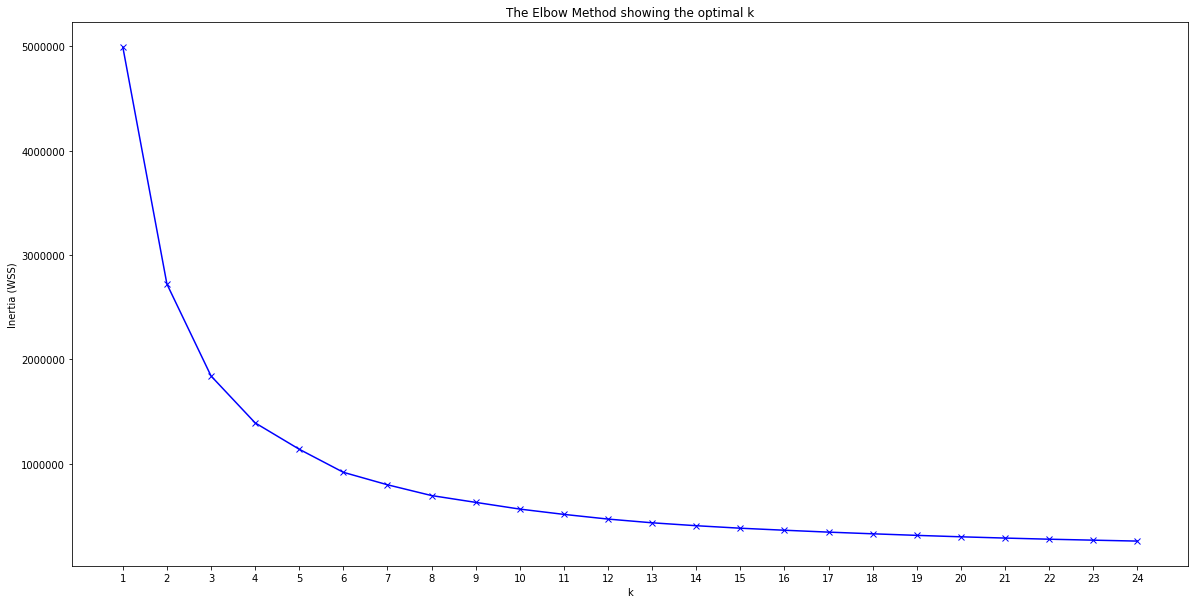

In [18]:
# Plot the elbow
plt.figure(figsize=(20,10))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.xticks(K)
plt.ylabel('Inertia (WSS)')
plt.title('The Elbow Method showing the optimal k')
plt.show()

For n_clusters = 2 The average silhouette_score is : 0.4683698016307535


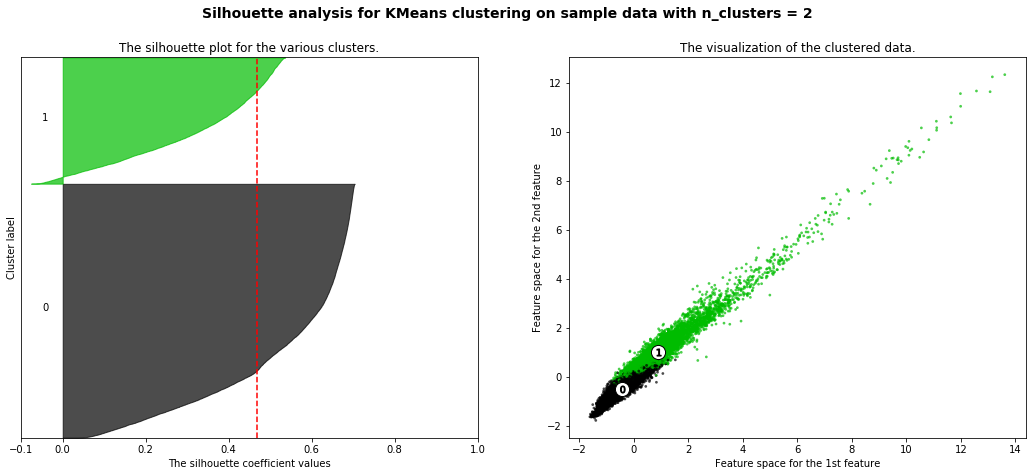

For n_clusters = 3 The average silhouette_score is : 0.4476283880011873


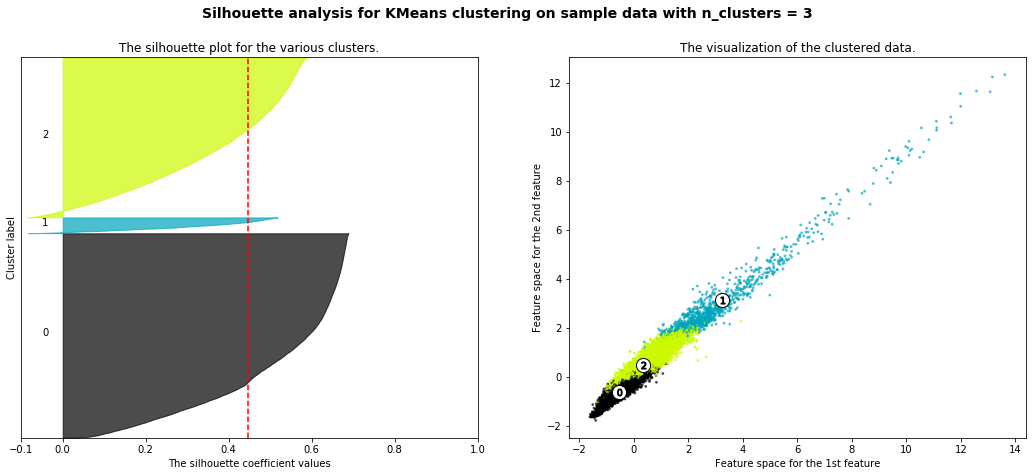

For n_clusters = 4 The average silhouette_score is : 0.3962124295685764


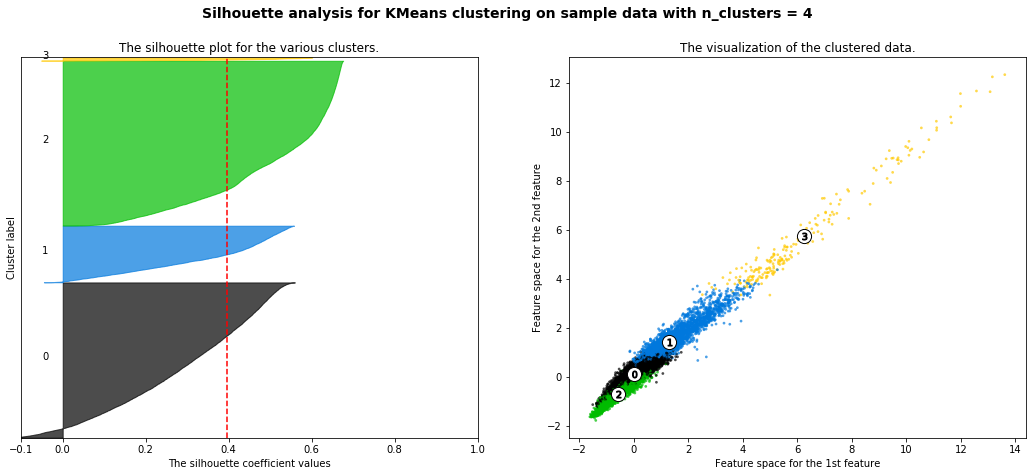

For n_clusters = 5 The average silhouette_score is : 0.4150410353224811


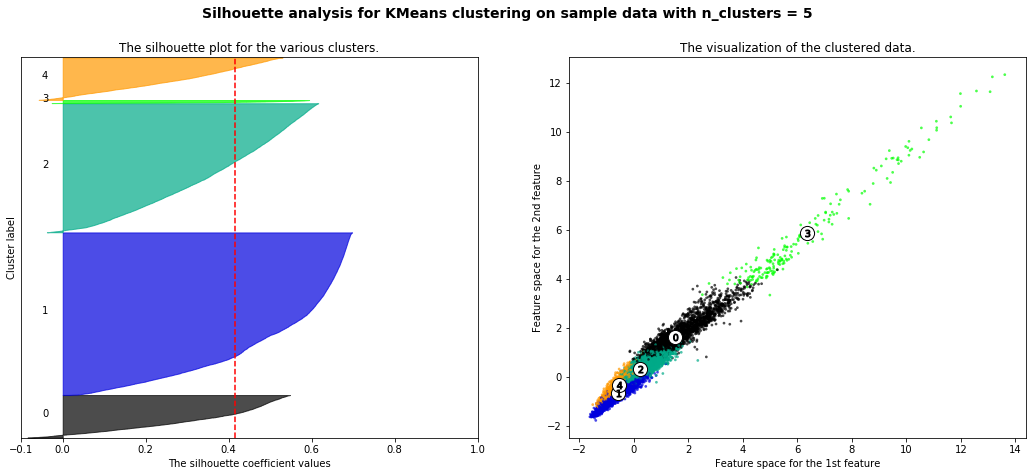

For n_clusters = 6 The average silhouette_score is : 0.3673154104015386


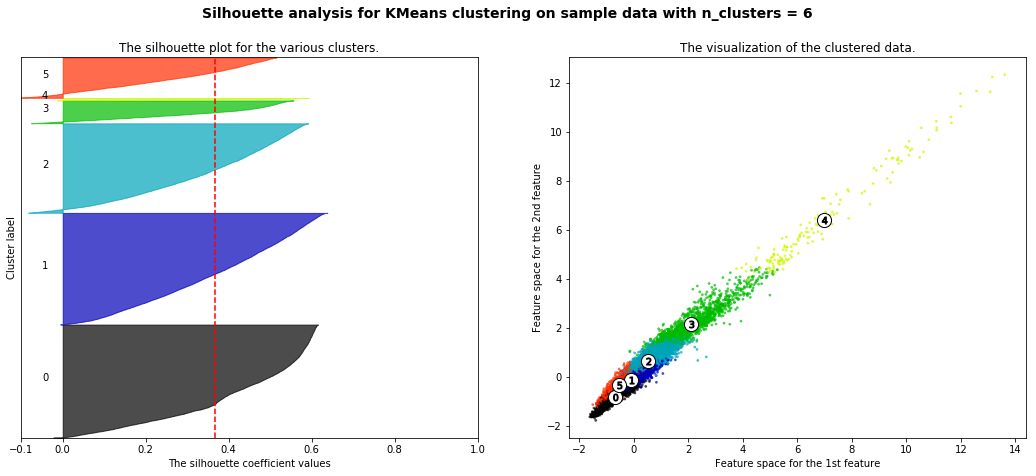

For n_clusters = 7 The average silhouette_score is : 0.34006670689076113


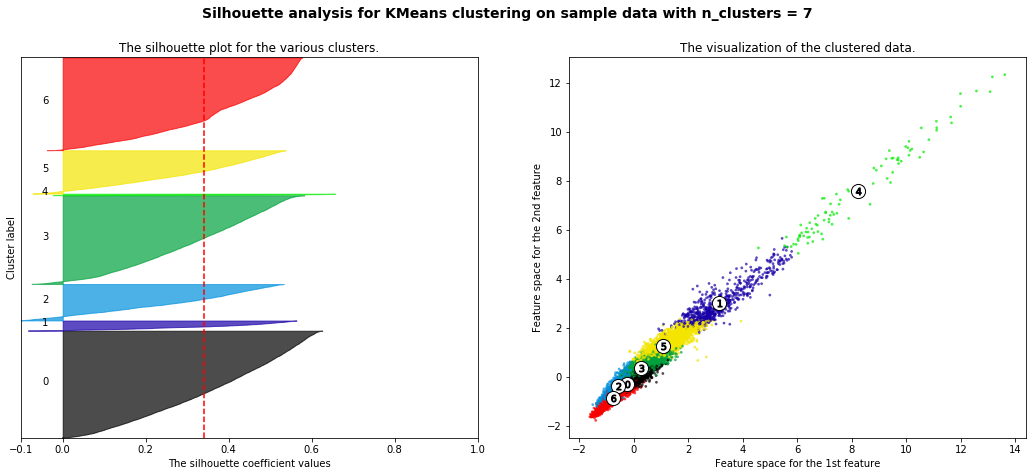

For n_clusters = 8 The average silhouette_score is : 0.3646508253895963


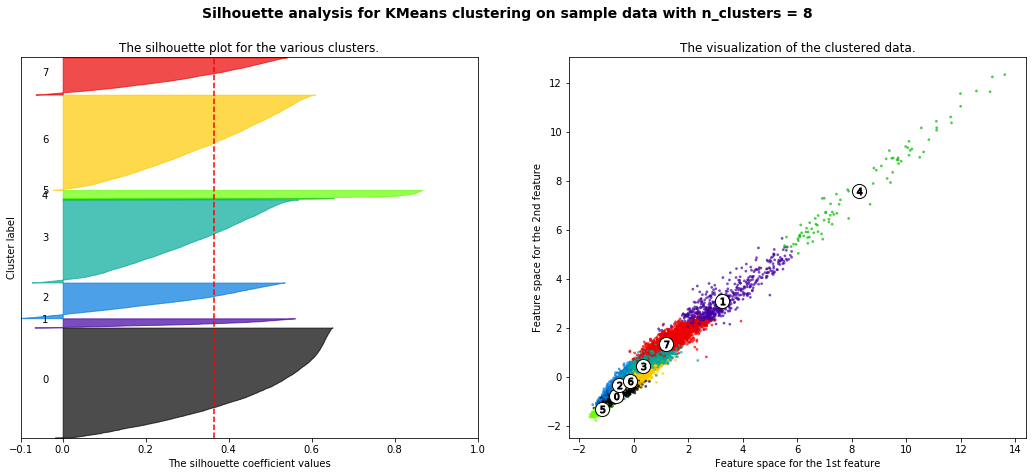

For n_clusters = 9 The average silhouette_score is : 0.34602536455962596


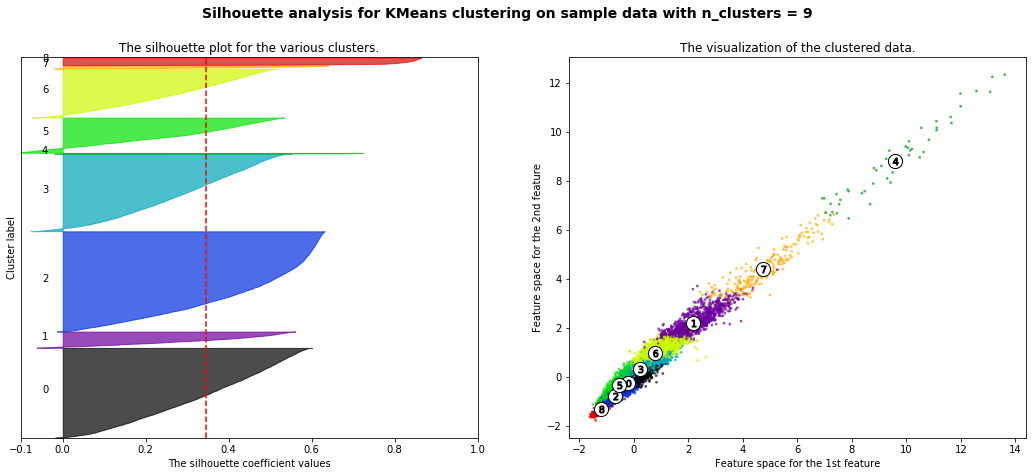

For n_clusters = 10 The average silhouette_score is : 0.3575470351749871


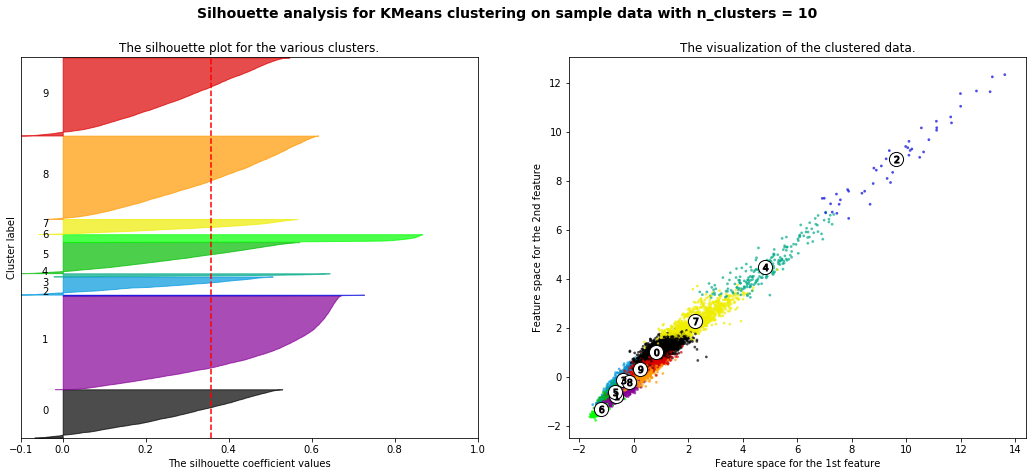

For n_clusters = 11 The average silhouette_score is : 0.35773615860722946


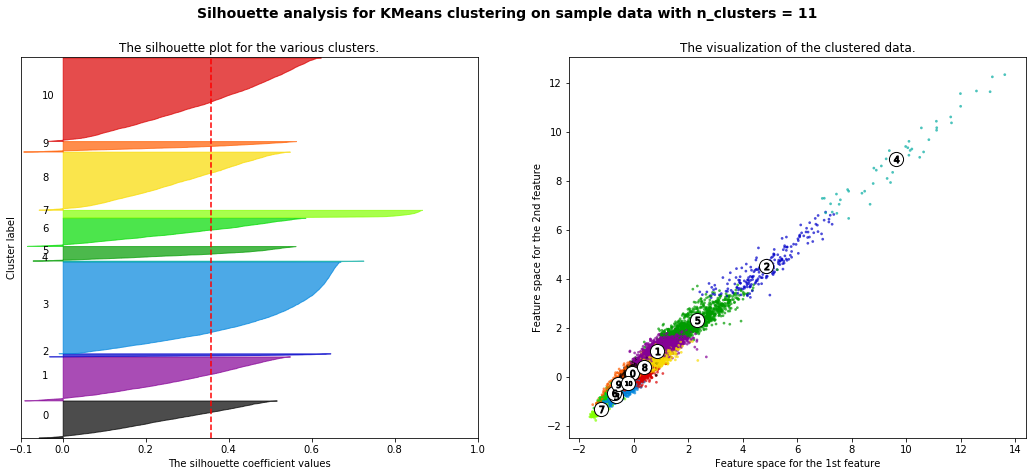

For n_clusters = 12 The average silhouette_score is : 0.331918229955819


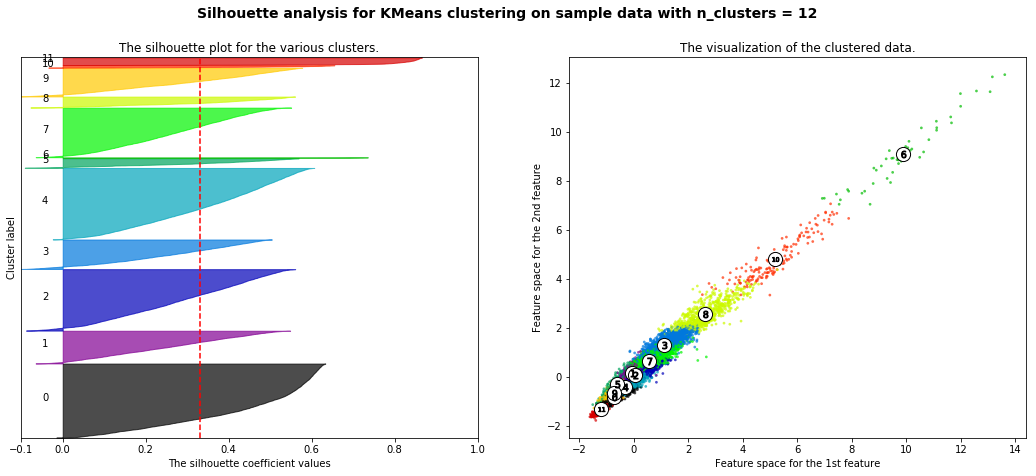

For n_clusters = 13 The average silhouette_score is : 0.32298881397102674


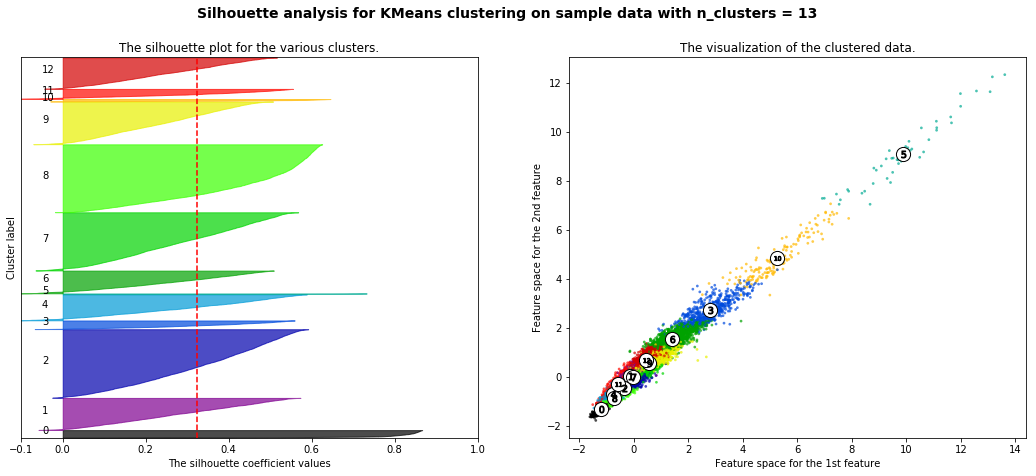

For n_clusters = 14 The average silhouette_score is : 0.31703766355875557


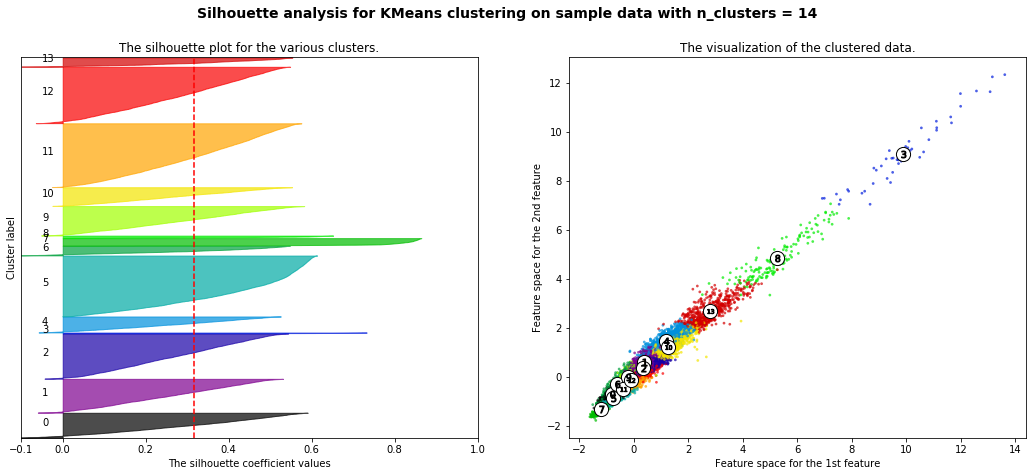

For n_clusters = 15 The average silhouette_score is : 0.3102823372342003


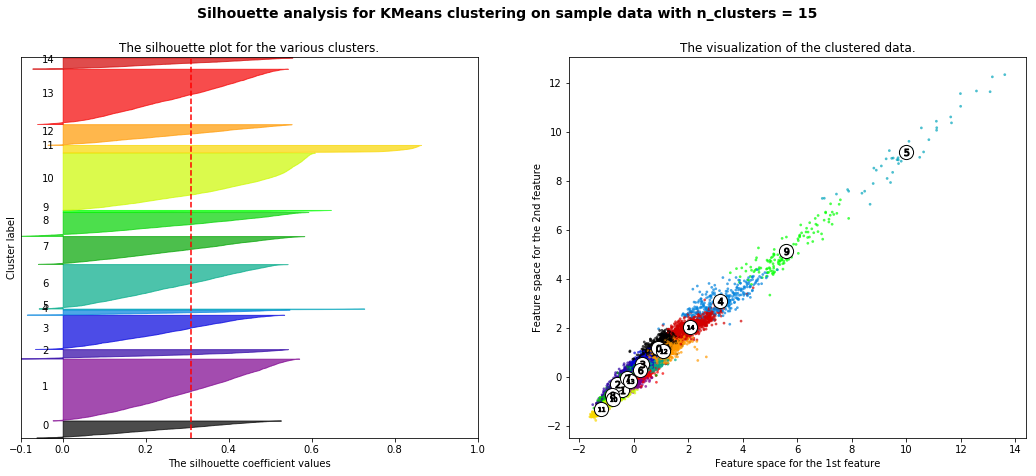

For n_clusters = 16 The average silhouette_score is : 0.31935570723959


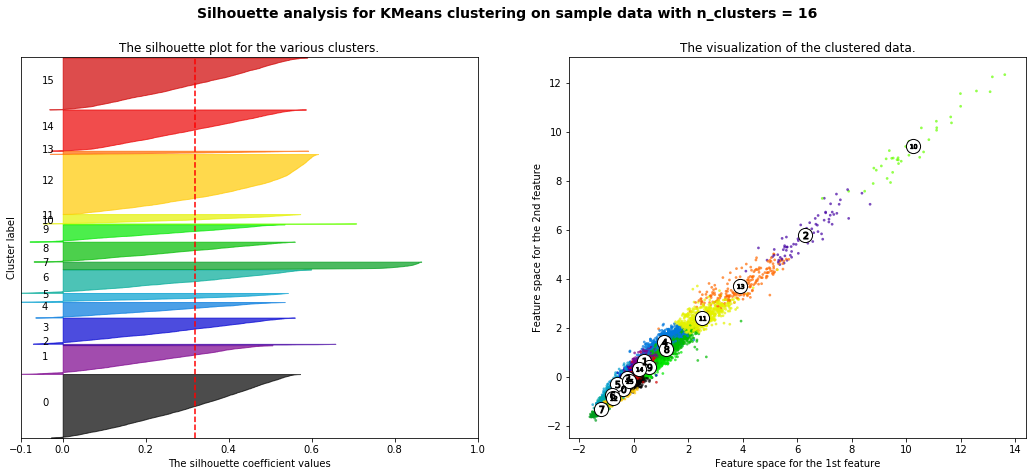

For n_clusters = 17 The average silhouette_score is : 0.31161928765451286


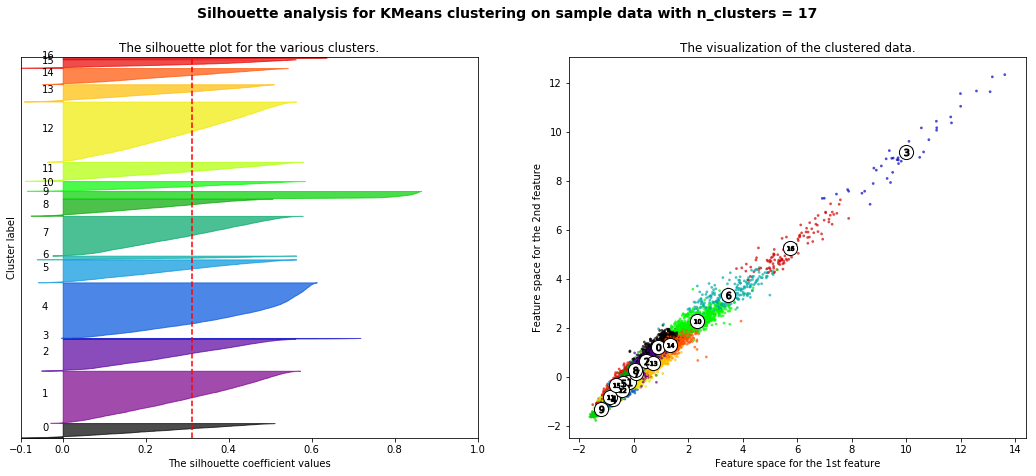

For n_clusters = 18 The average silhouette_score is : 0.319440193590901


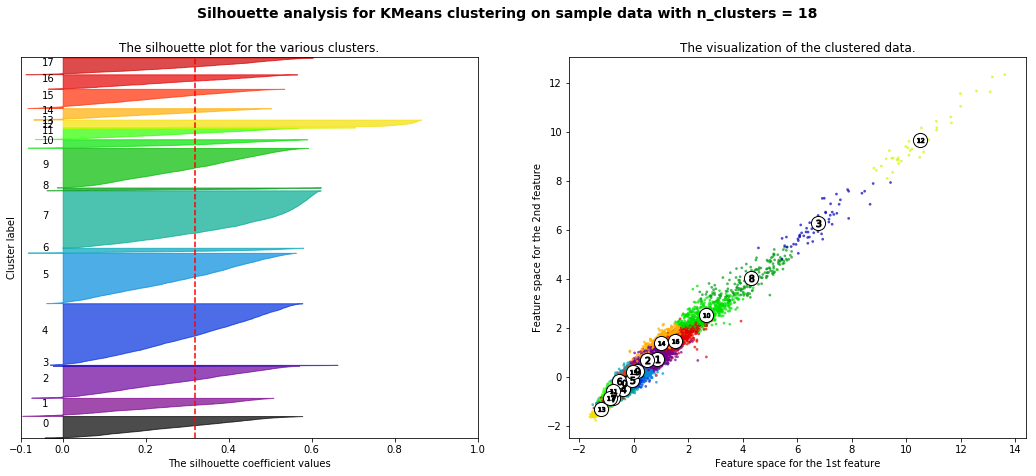

For n_clusters = 19 The average silhouette_score is : 0.30192114717701735


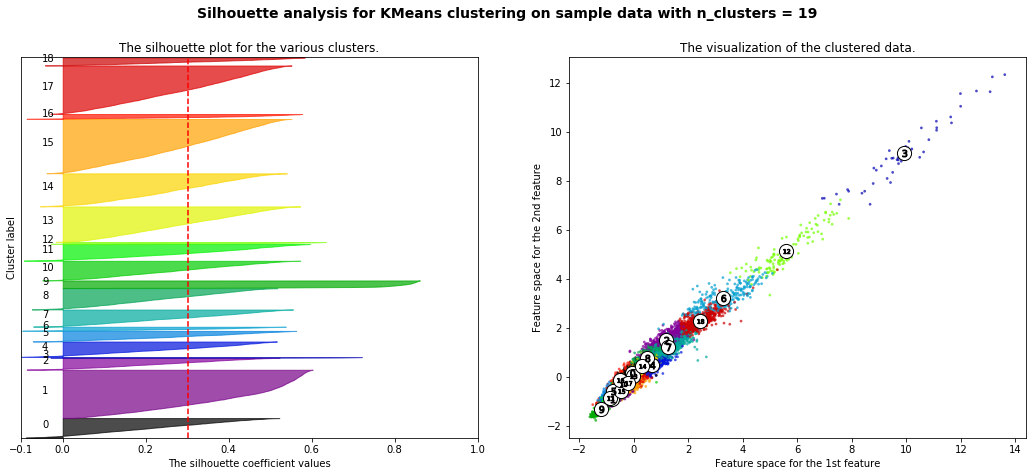

For n_clusters = 20 The average silhouette_score is : 0.2999999323081371


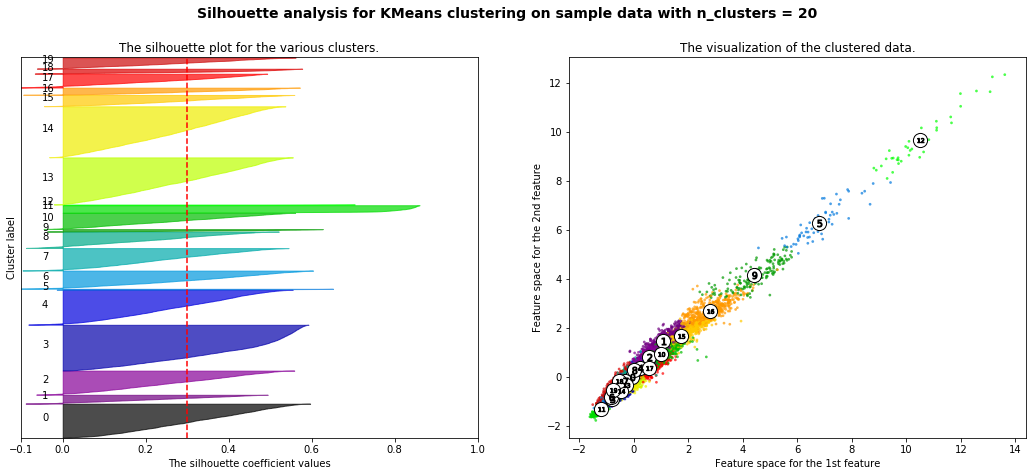

For n_clusters = 21 The average silhouette_score is : 0.3016641328144552


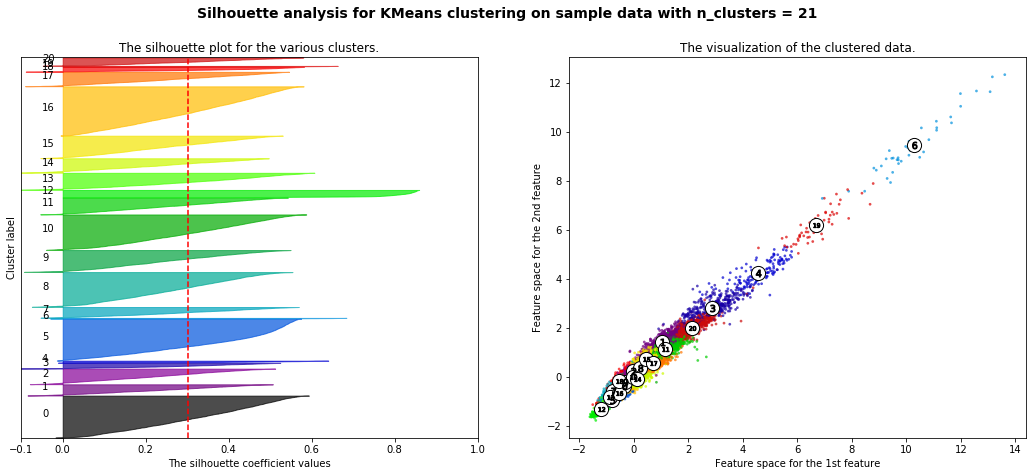

For n_clusters = 22 The average silhouette_score is : 0.31074334668043097


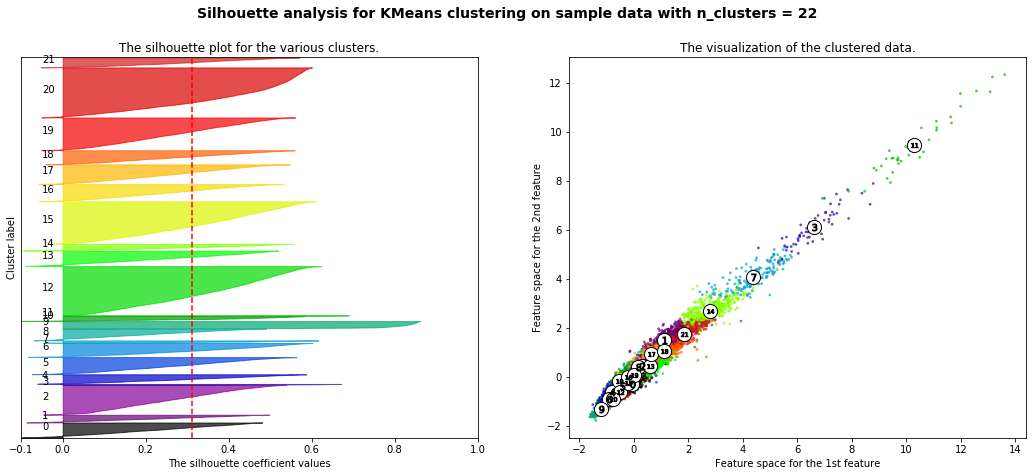

For n_clusters = 23 The average silhouette_score is : 0.2944515225353924


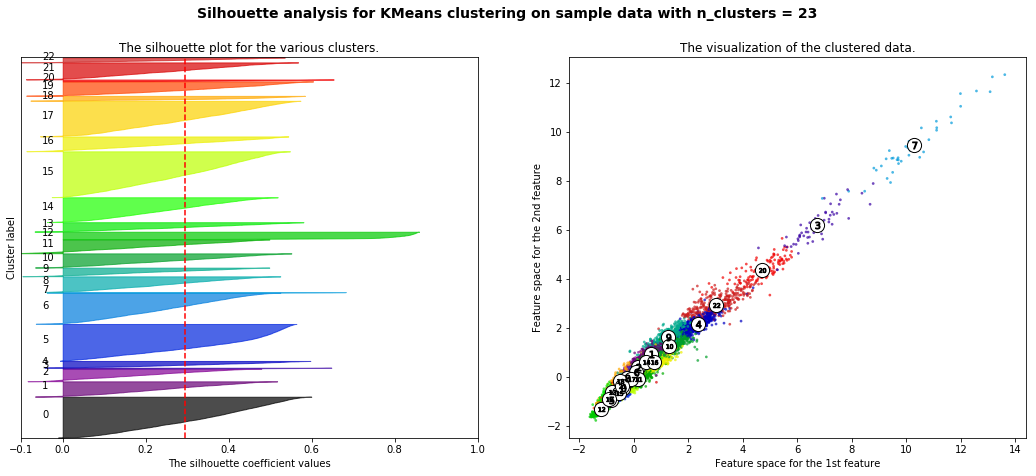

For n_clusters = 24 The average silhouette_score is : 0.29385747337791424


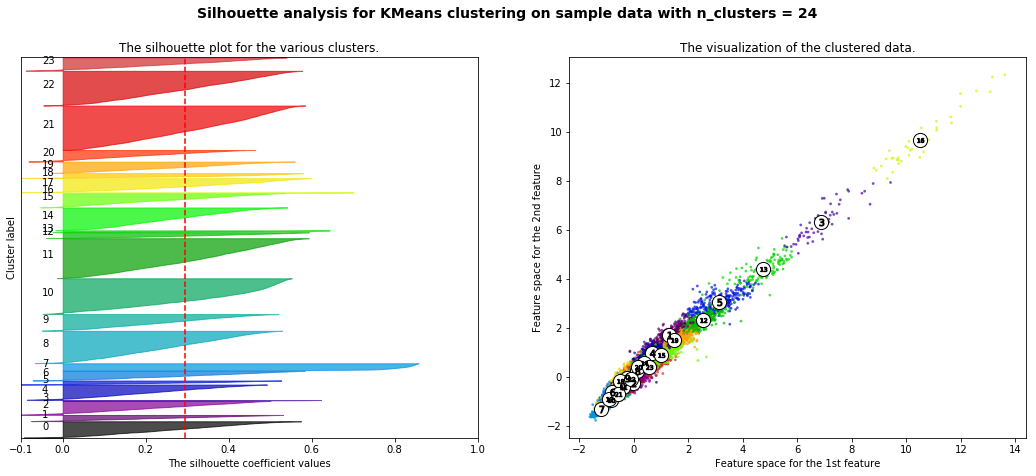

In [19]:
X = X_sklearn[np.random.choice(X_sklearn.shape[0], 25000, replace=False)]

#range_n_clusters = [2, 3, 4, 5, 6]
range_n_clusters = list(range(2,25))

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

    plt.show()